In [108]:
import numpy as np

In [109]:
np.random.seed(0)

n=1000
x=np.linspace(0, 1,n) #generate input

def f(input): #generating output
    return np.sin(2 * np.pi * input)

y=f(x) + 0.1 * np.random.randn(n) #add noise

split_index = int(0.8 * n)
x_train,x_test = x[:split_index], x[split_index:]
y_train,y_test = y[:split_index], y[split_index:]

In [110]:
def design_matrix(x,d): #create design matrix for polynomial regression
    return np.vstack([x**d for d in range (d+1)]).T

In [111]:
def normal_equation(x,y):
    return np.linalg.inv(x.T @ x) @ x.T @ y

In [112]:
def predict(x, theta):
    return x@theta

In [113]:
def mse(y_predicted,y_true):
    return np.mean((y_predicted - y_true)**2)

In [114]:
degrees = [1, 3, 10, 15, 20]

train_errors = []
test_errors = []

for d in degrees:
    X_train = design_matrix(x_train, d)
    X_test = design_matrix(x_test, d)
    
    theta = normal_equation(X_train, y_train)
    
    y_train_pred = predict(X_train, theta)
    y_test_pred = predict(X_test, theta)
    
    train_errors.append(mse(y_train_pred, y_train))
    test_errors.append(mse(y_test_pred, y_test))

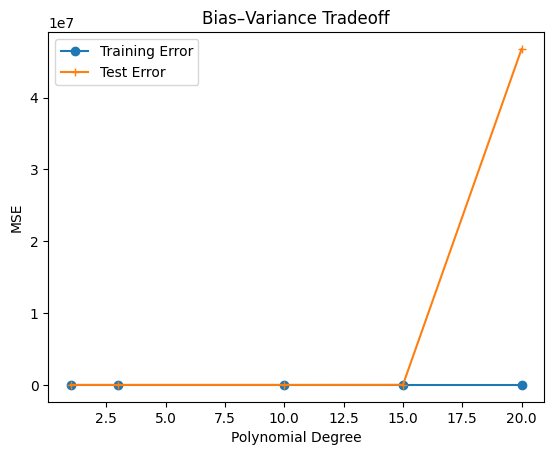

In [115]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(degrees, train_errors, marker='o', label='Training Error')
plt.plot(degrees, test_errors, marker='+', label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.title('Bias–Variance Tradeoff')
plt.show()

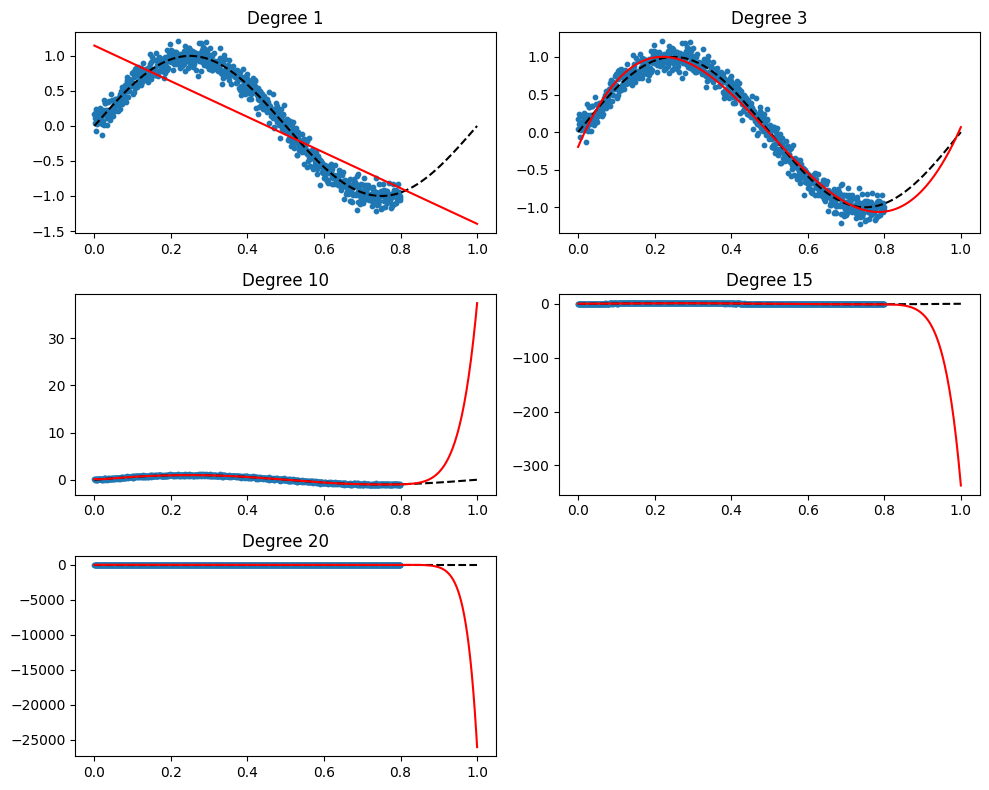

In [116]:
x_dense = np.linspace(0, 1, 500)

plt.figure(figsize=(10,8))

for i, d in enumerate(degrees):
    X_train = design_matrix(x_train, d)
    theta = normal_equation(X_train, y_train)
    
    X_dense = design_matrix(x_dense, d)
    y_dense_pred = predict(X_dense, theta)
    
    plt.subplot(3, 2, i+1)
    plt.scatter(x_train, y_train, s=10, label='Train data')
    plt.plot(x_dense, f(x_dense), 'k--', label='True function')
    plt.plot(x_dense, y_dense_pred, 'r', label='Model')
    plt.title(f'Degree {d}')
    plt.tight_layout()


Although the 20th degree looks the most suitable fit for the data, it don't as we can see that it has the highest test error.